# TensorFlow Assignment: Multi-Layer Perceptron (MLP)

**[Duke Community Standard](http://integrity.duke.edu/standard.html): By typing your name below, you are certifying that you have adhered to the Duke Community Standard in completing this assignment.**

Name: Sourav Sen

### Multi-layer Perceptron

Build a 2-layer MLP for MNIST digit classfication. Feel free to play around with the model architecture and see how the training time/performance changes, but to begin, try the following:

Image (784 dimensions) -> fully connected layer (500 hidden units)  -> nonlinearity (ReLU) -> fully connected layer (100 hidden units) -> nonlinearity (ReLU) -> fully connected (10 hidden units) -> softmax

/home/supers/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Training image data:  (55000, 784)
Testing image data:  (10000, 784)
28 x 28 =  784

Train image 1 is labelled one-hot as [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{t

100%|██████████| 50/50 [06:22<00:00,  7.64s/it]


Test accuracy: 0.9722999930381775


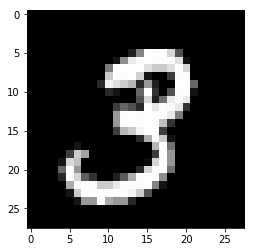

In [1]:
### YOUR CODE HERE

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange         


#Using tensoflow option to download and format MNIST dataset 
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# Dataset statistics
print('Training image data: ', mnist.train.images.shape)
print('Testing image data: ', mnist.test.images.shape)
print('28 x 28 = ', 28*28)

# Example image
print('\nTrain image 1 is labelled one-hot as {0}'.format(mnist.train.labels[1,:]))
image = np.reshape(mnist.train.images[1,:],[28,28])
plt.imshow(image, cmap='gray')


#MLP
import tensorflow as tf
# Define input placeholder
X = tf.placeholder(tf.float32, [None, 784])


# Hidden layer 1 (500 hidden units) -> nonlinearity (ReLU) 
W1 = tf.Variable(tf.truncated_normal([784, 500], stddev=0.1))
b1 = tf.Variable(tf.truncated_normal([500], stddev=0.1))
raw_score1 = tf.matmul(X, W1) + b1
latent_score1 = tf.nn.relu(raw_score1)

# Hidden layer 2 (100 hidden units) -> nonlinearity (ReLU) 
W2 = tf.Variable(tf.truncated_normal([500, 100], stddev=0.1))
b2 = tf.Variable(tf.truncated_normal([100], stddev=0.1))
raw_score2 = tf.matmul(latent_score1, W2) + b2
latent_score2 = tf.nn.relu(raw_score2)


# Output layer (10 hidden units) -> softmax
W = tf.Variable(tf.truncated_normal([100, 10], stddev=0.1))
b = tf.Variable(tf.truncated_normal([10], stddev=0.1))
raw_score = tf.matmul(latent_score2, W) + b

# Define labels placeholder
y = tf.placeholder(tf.float32, [None, 10])

# Softmax to probabilities
score = tf.nn.softmax(raw_score)

# Loss
loss = tf.nn.softmax_cross_entropy_with_logits(logits=raw_score, labels=y)
avg_loss = tf.reduce_mean(loss)


# Optimizers
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(avg_loss)


# Create a session object and initialize all graph variables
sess = tf.Session()
sess.run(tf.global_variables_initializer())


# Train the model
# trange is a tqdm function. It's the same as range, but adds a pretty progress bar
for epoch in trange(50):
    for which_batch in range(550):
        batch_xs = mnist.train.images[which_batch*100:(which_batch+1)*100]
        batch_ys = mnist.train.labels[which_batch*100:(which_batch+1)*100]
        sess.run(train_step, feed_dict={X: batch_xs, y: batch_ys})
        
        
# Test trained model
correct_prediction = tf.equal(tf.argmax(score, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# Make sure to print out your accuracy on the test set at the end.
print('Test accuracy: {0}'.format(sess.run(accuracy, feed_dict={X: mnist.test.images,
                                                                y: mnist.test.labels})))
